In [1]:
#导入包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mpl_toolkits.axisartist as axisartist
import math
from scipy import integrate
import networkx as nx
import matplotlib as mpl 

In [2]:
#周期序列
Q =np.array([0.87,0.49,0.36,0.83,0.87,0.49,0.36,0.83,0.87,0.49,0.36,0.83,0.87,0.49,0.36,0.83,0.87,0.49,0.36,0.83])
Q2=np.array([0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18])

#随机序列，输入序列长度，返回序列
def random(n):
    return np.random.rand(n)

#Conway分形序列
def conway(n):
    a=np.array([1,1])
    for i in range(2,n):
        a=np.append(a,a[a[i-1]-1]+a[i-a[i-1]])
    return (a-np.array(range(1,n+1))/2)

#正弦序列
def sin(n):
    return np.sin(np.linspace(0, n/10, n))+1
    
#lorenz序列
def lorenz(p,t,s,r,b):
    x,y,z = p.tolist()               #无质量点的当前位置(x,y,z)
    #print("x,y,z,t:",x,y,z,t)         #帮助理解odeint的执行过程
    return s*(y-x),x*(r-z)-y,x*y-b*z #返回dx/dt,dy/dt,dz/dt
t = np.arange(0,30,0.01)
track1 = integrate.odeint(lorenz,(0.0,1.00,0.0),t,args=(10.0,29.0,2.6))
track2 = integrate.odeint(lorenz,(0.0,1.01,0.0),t,args=(10.0,29.0,2.6))
#print(track2[:,2][:3000])

In [3]:
#getVGPoint函数：输入序列Q，返回VG图中需要连接的两点坐标的集合
def getVGPoint(Q):
    #坐标
    x=np.array(range(1,len(Q)+1))
    y=np.array(Q)

    #准备序列a,b，将相连的两点的x坐标分别记录在a,b序列中
    a=[]
    b=[]

    #遍历,获得连接两点的横坐标
    #控制ta移动
    for ta in range(0,len(x)-1):
        #控制tb移动
        for tb in range(ta+1,len(x)):
            ta=ta
            ya=y[ta]
            tb=tb
            yb=y[tb]
            #tc在ta,tb之间
            tc=np.array(range(ta+1,tb))
            yc=y[(ta+1):tb]
            #如果相邻，或者值1大于值2，则记录下来
            #并打印相连的两点的坐标用(ta,tb)表示
            if tb-ta==1 or min((yb-yc)/(tb-tc))>(yb-ya)/(tb-ta):
                a.append(ta)
                b.append(tb)
                #print('(',ta,',',tb,')',round(abs(math.atan((yb-ya)/(tb-ta))),2))
    arr=[a,b]
    return arr

#使用斜率，优化了原来的算法
def getVGPoint2(Q):
    #结果集
    arr,arr_ti,arr_tj = [],[],[]
    #让ti遍历整个Q数据集，不遍历最后一个元素所以为len(Q)-1
    for ti in range(len(Q)-1):
        yi = Q[ti]
        # 把每个数据点初始的斜率定义为负无穷小
        k = float("-inf")
        tjs = np.array(range(ti + 1, len(Q)))
        if len(tjs) > 0:
            for tj in tjs:
                yj =Q[tj]
                k_new = (yj - yi) / (tj - ti)
                #print(sij)
                if k_new > k:
                    k = k_new
                    #添加ij连边
                    arr_ti.append(ti)
                    #print(arr_ti)
                    arr_tj.append(tj)
                else:
                    next
        else:
            break
    arr=[arr_ti,arr_tj]
    return arr

getVGPoint2(Q2)

[[0, 1, 2, 2, 2, 2, 3, 3, 4, 5, 6, 6, 6, 6, 7, 7, 8, 9, 10],
 [1, 2, 3, 4, 5, 6, 4, 5, 5, 6, 7, 8, 9, 10, 8, 9, 9, 10, 11]]

In [4]:
#对VG效率进行了改进,时间复杂度为n2，但由于使用向量，因此比一般n2快很多
#getVGPoint_z：输入Q，返回VG的连接点数组
def getVGPoint_z(Q):
    #1.初始化斜率数组(长度n)，全设为-Inf
    k=np.array([float("-inf")]*len(Q))
    #初始化两个数组，保存连接点
    #若a，b为俩连接点，a保存在arr1，b保存在arr2
    arr1=np.array([])
    arr2=np.array([])
    #while循环,若k数组长度为1，就停止(或for循环n-1次)
    for i in range(1,len(Q)):
        #2.进行差分，得到新斜率
        k_new=(Q[i:]-Q[:-i])/i
        #3.比较新斜率和原来的斜率
        #若新的斜率大，则替换原来的斜率，并获取其索引值，作为连接的点
        #3.1(连接)获取斜率大对应的索引值并添加到数组中
        #每次k_new都会少一位，所以k也减一位，来与k_new对应
        #k=k[:-1]
        #或者说k每次都少取一位，即用k[:-i]
        big_index=np.where(k_new>k[:-i])
        arr1=np.append(arr1,big_index)
        arr2=np.append(arr2,np.array(big_index)+int(i))
        #3.2(更新)将斜率更新为大的斜率
        k[big_index]=k_new[big_index]
    
    #返回
    return np.array([arr1,arr2]).astype(int)

getVGPoint_z(Q2)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  2,  3,  6,  7,  2,
         6,  2,  6],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  4,  5,  8,  9,  5,
         9,  6, 10]])

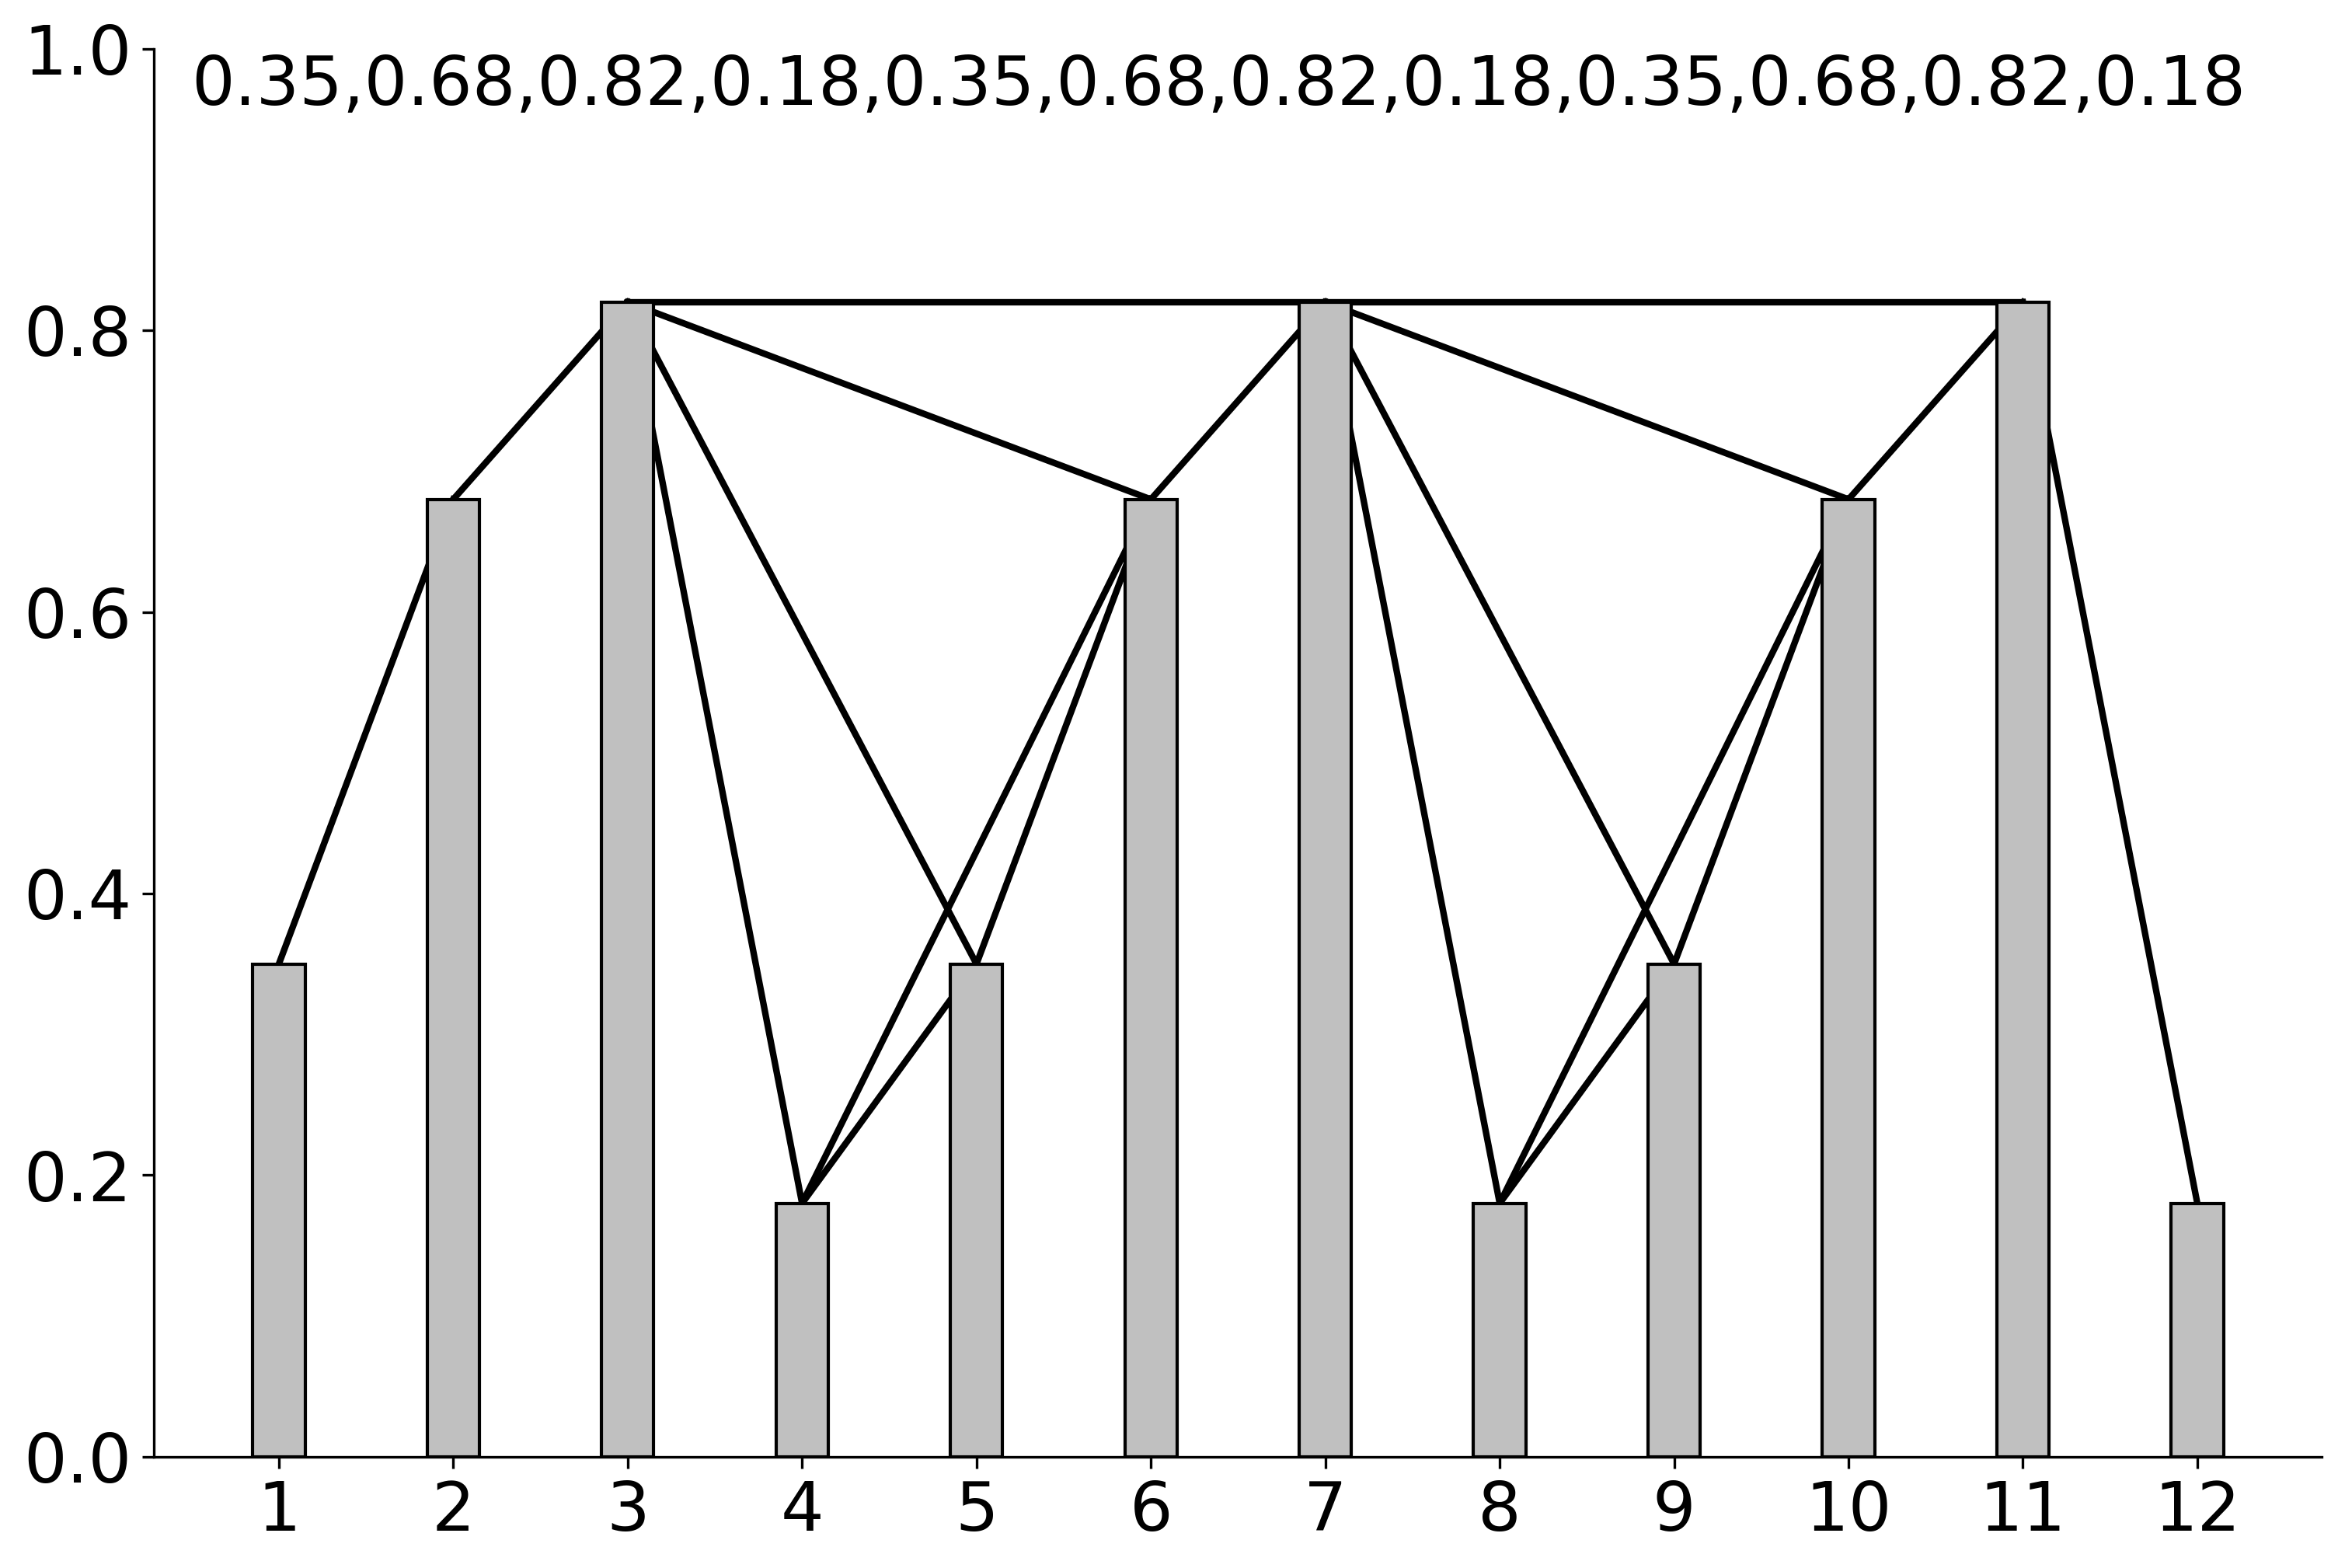

In [5]:
#VG_bar函数：输入序列Q，输出VG条形图（需先调用getVGPoint函数）
def VG_bar(Q):
    #准备画布，和一个坐标轴
    fig = plt.figure(figsize=(12, 8), dpi=300)#设置图形大小
    ax = fig.add_subplot(111)
    
    #将绘图区对象添加到画布中
    fig.add_axes(ax)
    
    #设置样式
    #ax.set_yticks([])#不显示y坐标轴标签
    plt.ylim(0,1)
    plt.tick_params(labelsize=10)
    ax.spines['top'].set_visible(False)#不显示上边框
    ax.spines['right'].set_visible(False)#不显示右边框
    
    #画条形图
    x= np.array(range(0,len(Q)))
    p1=ax.bar(x,Q,width=0.3,color='#C0C0C0',edgecolor='black',zorder=10)

    #获取要连接两点的坐标
    arr=getVGPoint2(Q)

    #在图中连接两点
    for i in range(0,len(arr[0])):
        p2=ax.plot([arr[0][i],arr[1][i]],[Q[arr[0][i]],Q[arr[1][i]]],color='black',linestyle='-',linewidth=2,zorder=0)
    
    #设置x轴刻度的值（为直方条高度），调整字体大小
    plt.xticks(x,range(1, len(Q) + 1),fontsize=21)
    plt.yticks(fontsize=21)
    
    
    plt.text(-0.5, 0.96, "0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18", size=21,
        bbox=dict(boxstyle="square",
                 color="#FFFFFF"
                  )
        )
    #显示图像
    plt.rcParams['xtick.direction'] = 'in' #将x轴的刻度线方向设置向内
    plt.rcParams['ytick.direction'] = 'in' #将y轴的刻度方向设置向内
    
    #保存图片
    #plt.savefig('E:\\VG_bar.png',bbox_inches="tight",dpi=600)
    
    #显示图像
    plt.show()
    
#调用
VG_bar(Q2)

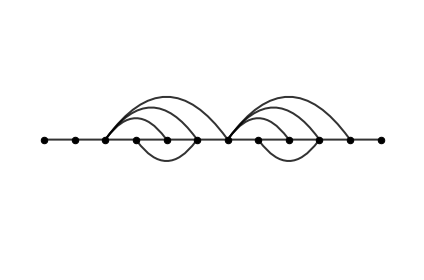

In [6]:
#VG_net函数：输入序列Q，输出VG网络图
def VG_net(Q):
    
    arr=getVGPoint(Q)
    x=np.array(range(0,len(Q)))
    G = nx.Graph()        # 无多重边有向图

    #点
    G.add_nodes_from(x)  # 添加多个节点

    #边
    for i in range(0,len(arr[0])):
        if arr[1][i]-arr[0][i]==1:
            G.add_edges_from([(arr[0][i],arr[1][i])],rad=0)
        else:
            G.add_edges_from([(arr[0][i],arr[1][i])],rad=0.7)

    #位置
    pos=dict()
    for i in range(len(Q),-1,-1):
        sd={i:(i,0)}
        pos={**sd,**pos}
        
    #画点
    nx.draw_networkx_nodes(G, pos, node_size=42, nodelist=x, node_color="black")

    ax = plt.gca()

    #画边
    edge1=[[],[]]#存储边
    for edge in G.edges(data=True):
        edge1[0].append(edge[0])
        edge1[1].append(edge[1])
        
        if edge[2]["rad"]==0:
            arrowprops=dict(arrowstyle="-",color='black',connectionstyle=f'arc3, rad = -{edge[2]["rad"]}',linestyle= '-',alpha=0.8,linewidth=2)
            ax.annotate("", xy=[edge[0],0], xytext=[edge[1],0],arrowprops=arrowprops)
        else:
            for i in range(len(edge1[0])):
                #判断边是否与前面某条边有交叉，如果有就在下边画
                panduan=edge[0]>edge1[0][i] and edge[0]<edge1[1][i] and edge[1]>edge1[1][i]
                if panduan:
                    arrowprops=dict(arrowstyle="-",color='black',connectionstyle=f'arc3, rad = -{edge[2]["rad"]}',linestyle= '-',alpha=0.8,linewidth=2)
                    ax.annotate("", xy=[edge[0],0], xytext=[edge[1],0],arrowprops=arrowprops)
                    break
            #如果没有就在上边画
            if i==len(edge1[0])-1 and not panduan:
                arrowprops=dict(arrowstyle="-",
                                color='black',
                                connectionstyle=f'arc3, rad = {edge[2]["rad"]}',
                                linestyle= '-',
                                alpha=0.8,
                                linewidth=2)
                ax.annotate("", xy=[edge[0],0], xytext=[edge[1],0],arrowprops=arrowprops)
    
    
    ax.margins(0.11)
    plt.tight_layout()
    plt.axis("off")
    #plt.savefig('E:\\VG_net.png',dpi=600)
    plt.show()

VG_net(Q2)

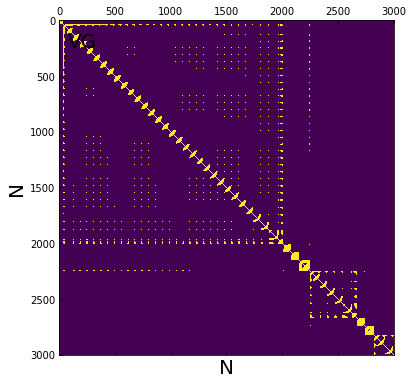

In [8]:
#VG_matrix函数：生成VG的邻接矩阵
def VG_matrix(Q):
    arr=getVGPoint_z(Q)
    x=np.array(range(0,len(Q)))
    G = nx.Graph()# 无多重边无向图
    #点
    G.add_nodes_from(x)  # 添加多个节点
    #边，将相连的两放进去
    for i in range(0,len(arr[0])):
        G.add_edges_from([(arr[0][i]+1,arr[1][i]+1)])
    #边，节点自连接
    for i in range(0,len(Q)):
        G.add_edges_from([(i+1,i+1)])
    
    # 画图的邻接矩阵
    matrix_arr=np.array(nx.adjacency_matrix(G).todense())
    #matrix_arr=nx.adjacency_matrix(G).todense()
    colors = ['blue','yellow'] 
    cmap = mpl.colors.ListedColormap(colors)
    plt.matshow(np.transpose(matrix_arr))
    
    #图的一些设置
    plt.xlabel('N',fontsize=20)
    plt.ylabel('N',fontsize=20)
    plt.title('VG',fontsize=20,y=0.9,x=0.07)
    
    #保存图片
    #plt.savefig('VG_混沌3000(track2[:,1]).png',dpi=600)
    #plt.show()
    #return p1

#调用函数
VG_matrix(track2[:,1])

[2, 1, 5, 2, 1, 1]


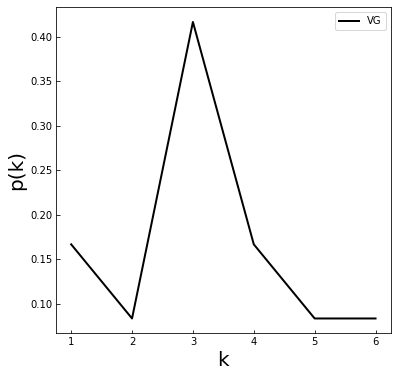

In [10]:
#VG_degree函数：生成度分布图
def VG_degree(Q):
    arr=getVGPoint(Q)
    x=np.array(range(0,len(Q)))
    G = nx.Graph()# 无多重边无向图
    
    #点
    G.add_nodes_from(x)
    
    #边，将相连的两放进去
    for i in range(0,len(arr[0])):
        G.add_edges_from([(arr[0][i],arr[1][i])])
    
    #边，节点自连接
    #for i in range(0,len(Q)):
    #    G.add_edges_from([(i+1,i+1)])
    
    #画度分布图
    #得到不同度的个数
    degree=nx.degree_histogram(G)#返回图中所有节点的度分布序列
    #去掉度为0的
    degree.pop(0)
    print(degree)
    #生成X轴序列，从1到最大度
    x=range(1,len(degree)+1)
    #将频次转化为频率，利用列表内涵
    y=[z/float(sum(degree))for z in degree]
    plt.plot(x,y,color="black",linewidth=2)#在双对坐标轴上绘制度分布曲线
    
    #图的一些设置
    plt.xlabel('k',fontsize=20)
    plt.ylabel('p(k)',fontsize=20)
    plt.legend(['VG'])
    
    #显示图表
    plt.show()
    
VG_degree(Q2)